<h2 align="center"> Exploratory Data Analysis II</h2>

In this project, statistical data analysis using nominal categorical variable were performed using the <a href='https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata'>TMDB 5000 Movie Dataset</a>, a Kaggle-hosted dataset with information about 5000 movies
<br>
<br>

`Statistical Data Types`  `Pandas`  `DataFrame`  `Series`  `Seaborn`  `Data Visualization`  `Matplotlib`

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head(3) # DataFrame

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


###  Data types:

<img src='statistical_data_type.png'
     width="600" 
     height="700"/>

#### Nominal categorical variable

* Qualitative data

For example, by using 'unique' a nominal category array for the languagues can be generated:

In [29]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

The most basic way to compare categories is to find out how many times each one appears:

In [30]:
tmdb["original_language"].value_counts() # Serie with one column and language as index

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
id       2
ta       2
ar       2
cs       2
ro       2
no       1
el       1
tr       1
xx       1
hu       1
nb       1
sl       1
vi       1
pl       1
is       1
ky       1
ps       1
af       1
te       1
Name: original_language, dtype: int64

In [31]:
language_count = tmdb["original_language"].value_counts().to_frame().reset_index()
language_count.columns = ["original_language", "total"]
language_count.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


##### Categorical plots:

Using seaborn:

<AxesSubplot:xlabel='original_language', ylabel='total'>

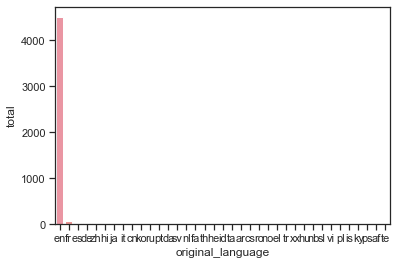

In [32]:
sns.barplot(x= "original_language", y= "total", data= language_count)

Easier way to code using source data: 

In [33]:
print(sns.__version__)

0.9.0


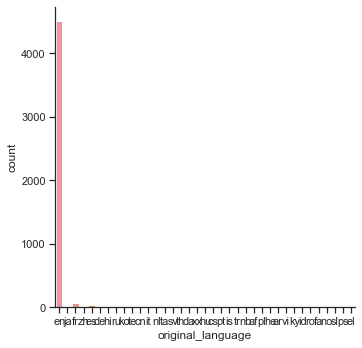

In [34]:
# Only possible for versions from 0.9.0
sns.catplot(x= "original_language", kind="count", data= tmdb) 

Not the best way to visualize the data, since english is by far the dominant one.

Another way is to isolate the dominat data could be:

In [35]:
total_by_language = tmdb["original_language"].value_counts()
total_all = total_by_language.sum()
total_english = total_by_language.loc["en"]
total_others = total_all - total_english
print(total_english, total_others)

4505 298


Creating a DataFrame with the above and plotting:

<AxesSubplot:xlabel='language', ylabel='total'>

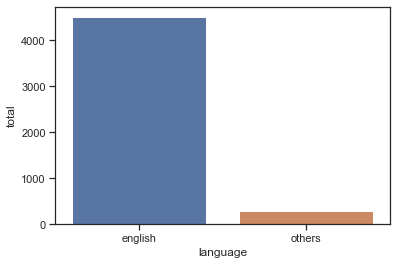

In [36]:
data = {
    'language' : ['english', 'others'],
    'total' : [total_english, total_others]
}

data = pd.DataFrame(data)

sns.barplot(x= "language", y= "total", data = data)

In [37]:
# Query with the data that are different from english
total_diff_english = tmdb.query("original_language != 'en'")
total_other_movies = total_diff_english.original_language.value_counts()
total_other_movies

fr    70
es    32
zh    27
de    27
hi    19
ja    16
it    14
cn    12
ru    11
ko    11
pt     9
da     7
sv     5
nl     4
fa     4
th     3
he     3
cs     2
ro     2
ar     2
id     2
ta     2
is     1
tr     1
pl     1
vi     1
xx     1
te     1
el     1
ps     1
af     1
hu     1
nb     1
sl     1
ky     1
no     1
Name: original_language, dtype: int64

Visualization of the relative importance of the languages other than english: 

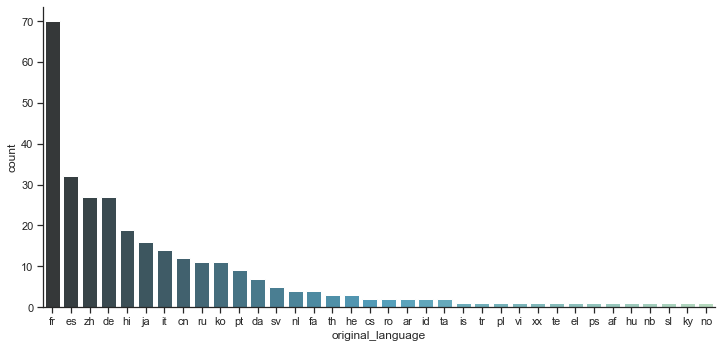

In [38]:
sns.catplot(x= "original_language", kind="count", data= total_diff_english,
            aspect=2,
            palette="GnBu_d",
            order= total_other_movies.index)

English is much stronger than other languagues in this dataset, followed by French and Spanish.